<a href="https://colab.research.google.com/github/VamsiKrishna-9/Predictive-Analytics-For-Data-Science/blob/main/Optimal%20Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal price to maximize revenue: $150.00


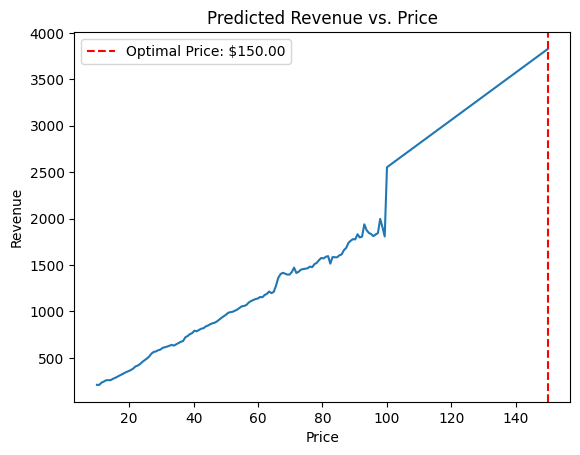

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample historical data: product pricing, demand, competition, behavior, seasonality
# Replace with actual dataset
data = pd.DataFrame({
    'price': np.random.uniform(10, 100, 1000),
    'competitor_price': np.random.uniform(9, 110, 1000),
    'seasonality_index': np.random.uniform(0.8, 1.2, 1000),
    'customer_interest': np.random.uniform(0.5, 1.5, 1000),
    'demand': np.random.poisson(20, 1000)
})

# Feature engineering
data['revenue'] = data['price'] * data['demand']

# Define features and target
X = data[['price', 'competitor_price', 'seasonality_index', 'customer_interest']]
y = data['demand']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a model to predict demand
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Optimization: try a range of prices and find the one that maximizes predicted revenue
def predict_revenue(price, competitor_price, seasonality_index, customer_interest):
    features = pd.DataFrame({
        'price': price,
        'competitor_price': competitor_price,
        'seasonality_index': seasonality_index,
        'customer_interest': customer_interest
    })
    predicted_demand = model.predict(features)
    return price * predicted_demand

# Example scenario
competitor_price = 60
seasonality_index = 1.1
customer_interest = 1.2
price_range = np.linspace(10, 150, 200)
revenues = predict_revenue(price_range, competitor_price, seasonality_index, customer_interest)

optimal_price = price_range[np.argmax(revenues)]
print(f"Optimal price to maximize revenue: ${optimal_price:.2f}")

# Optional: visualize
plt.plot(price_range, revenues)
plt.title("Predicted Revenue vs. Price")
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.axvline(optimal_price, color='r', linestyle='--', label=f'Optimal Price: ${optimal_price:.2f}')
plt.legend()
plt.show()
